<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset">Maladie d'Alzheimer (Diagnostic)</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/alzheimer_logo.jpg" width="96"></th>
 </tr>
</table>

<div style='text-align: center'>
<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/alzheimer.png" width="512">
</div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [44]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go

In [45]:
from sklearn.model_selection import train_test_split

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

In [46]:
sys.path.append(os.path.abspath('../outils/'))
from prjFormation import palette

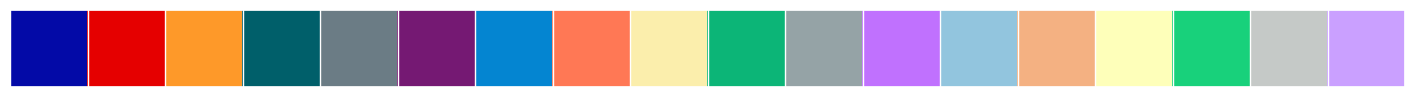

In [47]:
# palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
#             "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
#             "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
#           ]
sns.palplot(sns.color_palette(palette[:18]))

In [48]:
from classificationBinaires import initDictionnaireClassificateurs, executionEssaiComparaisonClassificateurs,\
                                   affichageEvolutionMetriques, affichageROC, executeValidationCroisee, afficheSeparationsBinaires

In [49]:
from prjFormation import initProjet,affichageDonnees2d,affichageDonnees3d,createLinkageMatrix, afficheDendrogram,\
                         affichageDistribution,afficheColonneCible, add_median_labels, formatPct, createColumnsQualitatives

In [50]:
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

In [51]:
projet = initProjet(repertoireRacine='.',nomProjet='MaladieAlzheimer-Classifications')

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Démarche pour constituer un modèle de classification </div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/demarche.png" width="800">

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>
<table>
        <tr>                                                                                   
             <th style='padding:15px;color:#030aa7;font-size:150%;text-align: left;font-weight: bold;font-family: Georgia, serif'>alzheimers_disease_data.csv</th>
             <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/alzheimer_logo.jpg" width="128"></th>
        </tr>  
<table>   
<table>
        <tr>                                                                                   
             <th  style="text-align:left;background-color:#053061;color:white;"> </th>
             <th  style="text-align:left;background-color:#053061;color:white;">Colonne initiale </th>
             <th  style="text-align:left;background-color:#053061;color:white;">Description</th>
        </tr>    
    <tr>
        <th  style="text-align:left"> </th>                            
        <th  style="text-align:left;font-style: italic">ID patient</th> 
        <th  style="text-align:left;font-style: italic">identifiant unique attribué à chaque patient (4751 à 6900)</th>
    </tr>  
    <tr>
        <th  style="text-align:left"> </th>                            
        <th  style="text-align:left;color:red;font-style: italic">Diagnosis</th> 
        <th  style="text-align:left;color:red;font-style: italic">statut du diagnostic de la maladie d'Alzheimer, où <b>0</b> indique <b>Non</b> et <b>1</b> indique <b>Oui</b></th>
    </tr>        
    <tr>
        <th  style="text-align:left">1 </th>                            
        <th  style="text-align:left;font-style: italic">Age</th> 
        <th  style="text-align:left;font-style: italic">l'âge des patients varie de 60 à 90 ans</th>
    </tr>    
    <tr>
        <th  style="text-align:left">2 </th>                            
        <th  style="text-align:left">Gender</th>                            
        <th  style="text-align:left">sexe des patients, où <b>0</b> représente un <b>homme</b> et <b>1</b> représente une <b>femme</b></th>
    </tr>    
    <tr>
        <th  style="text-align:left">3 </th>                            
        <th  style="text-align:left">Ethnicity</th>                          
        <th  style="text-align:left">l'origine ethnique des patients, codée comme suit :<br>
                                        0 : caucasien<br>
                                        1 : afro-américain<br>
                                        2 : asiatique<br>
                                        3 : autre
        </th>
    </tr>    
    <tr>
        <th  style="text-align:left">4 </th>                            
        <th  style="text-align:left">EducationLevel</th>                         
        <th  style="text-align:left">niveau d'éducation des patients, codé comme suit :
                                        0 : aucun<br>
                                        1 : lycée<br>
                                        2 : baccalauréat<br>
                                        3 : supérieur
        </th>
    </tr>    
    <tr>
        <th  style="text-align:left">5 </th>                            
        <th  style="text-align:left">BMI </th>                            
        <th  style="text-align:left">IMC : indice de masse corporelle des patients, allant de 15 à 40</th>
    </tr>  
    <tr>
        <th  style="text-align:left">6 </th>                            
        <th  style="text-align:left">Smoking </th>                      
        <th  style="text-align:left">Tabagisme : statut tabagique, où <b>0</b> indique non et <b>1</b> indique oui</th>
    </tr>    
    <tr>
        <th  style="text-align:left">7 </th>                            
        <th  style="text-align:left">AlcoholConsumption </th>              
        <th  style="text-align:left">Consommation d'alcool : Consommation hebdomadaire d'alcool en unités, allant de 0 à 20</th>
    </tr>  
    <tr>
        <th  style="text-align:left">8 </th>                            
        <th  style="text-align:left">PhysicalActivity</th>                            
        <th  style="text-align:left">Activité physique : Activité physique hebdomadaire en heures, allant de 0 à 10</th>
    </tr>   
    <tr>
        <th  style="text-align:left">9 </th>                            
        <th  style="text-align:left">DietQuality </th>                           
        <th  style="text-align:left">Qualité de l'alimentation : Score de qualité de l'alimentation, allant de 0 à 10</th>
    </tr> 
    <tr>
        <th  style="text-align:left">10 </th>                            
        <th  style="text-align:left">SleepQuality </th>                 
        <th  style="text-align:left">Qualité du sommeil : Score de qualité du sommeil, allant de 4 à 10</th>
    </tr>    
    <tr>
        <th  style="text-align:left">11 </th>                            
        <th  style="text-align:left">FamilyHistoryAlzheimers </th>                 
        <th  style="text-align:left">Antécédents familiaux : Maladie d'Alzheimer : Antécédents familiaux de maladie d'Alzheimer, où 0 indique Non et 1 indique Oui</th>
    </tr>    
    <tr>
        <th  style="text-align:left">12 </th>                            
        <th  style="text-align:left">CardiovascularDisease </th>                 
        <th  style="text-align:left">Maladie cardiovasculaire : Présence de maladie cardiovasculaire, où 0 indique Non et 1 indique Oui</th>
    </tr>    
    <tr>
        <th  style="text-align:left">13 </th>                            
        <th  style="text-align:left">Diabetes </th>                 
        <th  style="text-align:left">Diabète : Présence de diabète, où 0 indique Non et 1 indique Oui</th>
    </tr>    
    <tr>
        <th  style="text-align:left">14 </th>                            
        <th  style="text-align:left">Depression </th>                 
        <th  style="text-align:left">Dépression : Présence de dépression, où 0 indique Non et 1 indique Oui</th>
    </tr>    
    <tr>
        <th  style="text-align:left">15 </th>                            
        <th  style="text-align:left">HeadInjury </th>                 
        <th  style="text-align:left">Traumatisme crânien : Antécédents de traumatisme crânien, où 0 indique Non et 1 indique Oui</th>
    </tr>    
    <tr>
        <th  style="text-align:left">16 </th>                            
        <th  style="text-align:left">Hypertension </th>                 
        <th  style="text-align:left">Hypertension : Présence d'hypertension, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">17 </th>                            
        <th  style="text-align:left">SystolicBP </th>                 
        <th  style="text-align:left">BP systolique : pression artérielle systolique comprise entre 90 et 180 mmHg</th>
    </tr> 
    <tr>
        <th  style="text-align:left">18 </th>                            
        <th  style="text-align:left">DiastolicBP </th>                 
        <th  style="text-align:left">BP diastolique : pression artérielle diastolique comprise entre 60 et 120 mmHg</th>
    </tr> 
    <tr>
        <th  style="text-align:left">19 </th>                            
        <th  style="text-align:left">CholesterolTotal </th>                 
        <th  style="text-align:left">Cholestérol total : taux de cholestérol total compris entre 150 et 300 mg/dl</th>
    </tr> 
    <tr>
        <th  style="text-align:left">20 </th>                            
        <th  style="text-align:left">CholesterolLDL </th>                 
        <th  style="text-align:left">Cholestérol LDL : taux de cholestérol des lipoprotéines de basse densité compris entre 50 et 200 mg/dl</th>
    </tr> 
    <tr>
        <th  style="text-align:left">21 </th>                            
        <th  style="text-align:left">CholesterolHDL </th>                 
        <th  style="text-align:left">Cholestérol HDL : taux de cholestérol des lipoprotéines de haute densité compris entre 20 et 100 mg/dl</th>
    </tr> 
    <tr>
        <th  style="text-align:left">22 </th>                            
        <th  style="text-align:left">CholesterolTriglycerides </th>                 
        <th  style="text-align:left">Cholestérol triglycérides : taux de triglycérides compris entre 50 et 400 mg/dl</th>
    </tr> 
    <tr>
        <th  style="text-align:left">23 </th>                            
        <th  style="text-align:left">MMSE </th>                 
        <th  style="text-align:left">MMSE : score du Mini-Mental State Examination compris entre 0 et 30. Des scores inférieurs indiquent une déficience cognitive</th>
    </tr> 
    <tr>
        <th  style="text-align:left">24 </th>                            
        <th  style="text-align:left">FunctionalAssessment </th>                 
        <th  style="text-align:left">Évaluation fonctionnelle : score d'évaluation fonctionnelle, allant de 0 à 10. Les scores les plus bas indiquent une déficience plus importante</th>
    </tr> 
    <tr>
        <th  style="text-align:left">25 </th>                            
        <th  style="text-align:left">MemoryComplaints </th>                 
        <th  style="text-align:left">Plaintes de mémoire : présence de plaintes de mémoire, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">26 </th>                            
        <th  style="text-align:left">BehavioralProblems </th>                 
        <th  style="text-align:left">Problèmes de comportement : présence de problèmes de comportement, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">27 </th>                            
        <th  style="text-align:left">ADL </th>                 
        <th  style="text-align:left">AVQ : score des activités de la vie quotidienne, allant de 0 à 10. Les scores les plus bas indiquent une déficience plus importante</th>
    </tr> 
    <tr>
        <th  style="text-align:left">27 </th>                            
        <th  style="text-align:left">Confusion </th>                 
        <th  style="text-align:left">Confusion : présence de confusion, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">28 </th>                            
        <th  style="text-align:left">Disorientation </th>                 
        <th  style="text-align:left">Désorientation : présence de désorientation, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">29 </th>                            
        <th  style="text-align:left">PersonalityChanges </th>                 
        <th  style="text-align:left">Changements de personnalité : présence de changements de personnalité, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">30 </th>                            
        <th  style="text-align:left">DifficultyCompletingTasks </th>                 
        <th  style="text-align:left">Difficulté à accomplir des tâches : présence de difficulté à accomplir des tâches, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">31 </th>                            
        <th  style="text-align:left">Forgetfulness </th>                 
        <th  style="text-align:left">Oubli : présence d'oubli, où 0 indique Non et 1 indique Oui</th>
    </tr> 
</table>

In [52]:
donnees = pd.read_csv("../donnees/Alzheimer Disease/alzheimers_disease_data.csv", index_col=['PatientID','Diagnosis']).drop(columns='DoctorInCharge')
cible = 'Diagnosis'

In [53]:
donnees.sample(5)

,,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
PatientID,Diagnosis,,,,,,,,,,,,,,,,,,,,,
5130,0,70,0,1,1,35.922684,0,0.759744,6.323555,6.156986,8.191820,...,27.246246,2.724839,0,0,9.732256,1,1,0,0,0
6044,0,89,1,0,1,18.433310,1,15.571791,7.774400,2.629056,4.133590,...,29.421360,3.423872,0,1,8.874373,0,1,0,0,0
5631,0,67,0,1,2,29.726811,1,15.642599,4.605988,7.871526,7.915239,...,26.253987,6.088453,1,0,9.105791,0,0,0,0,0
6758,1,60,1,0,1,38.214532,1,8.757123,5.714610,9.824054,6.279848,...,29.399385,3.111863,0,0,8.364342,0,0,1,1,1
5783,0,69,1,2,0,30.677631,0,0.437171,2.068111,7.205286,4.822632,...,18.522432,6.197277,0,0,1.073017,0,0,0,0,0


In [54]:
donnees.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000


>> <div style='padding:15px;color:#030aa7;background-color:#d8dcd6;font-size:120%;text-align: left;font-family: Georgia, serif'>Il n'y a pas de valeurs non renseignées</div>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonInitial.png" width="800">

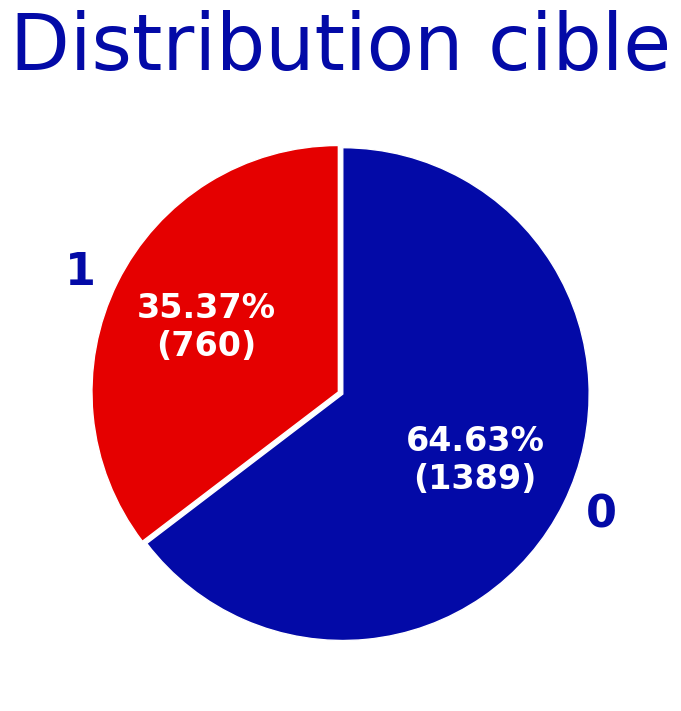

In [13]:
radius,size=0.8,0.3
fig,ax = plt.subplots(ncols=1,figsize=(8,8), subplot_kw=dict(aspect="equal"))

affichage = donnees.reset_index().groupby(cible).Age.count().reset_index().rename(columns={'Age':'nombre'})
affichage['%'] = affichage.nombre * 100 / affichage.nombre.sum()
affichage

wedges, texts, autotexts =  ax.pie(
         affichage['nombre'],
         autopct=lambda pct: formatPct(pct, affichage.nombre.values),   # autopct='%1.2f%%', 
         labels=affichage[cible].values,
         # shadow=True, 
         counterclock=False,
         startangle=90 ,
         colors = palette,
         # pctdistance=0.4, 
         labeldistance=1.1, 
         textprops=dict(color="#030aa7"),
         explode=[0.01 for _ in range(affichage[cible].count())]
      );
plt.setp(autotexts, size=24, weight="bold",color="w")
plt.setp(texts, size=32, weight="bold");
ax.set_title("Distribution cible",fontdict=dict(color="#030aa7", size=56));

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonTraitementValidation.png" width="800">

<div style='padding:15px;color:#030aa7;font-size:120%;text-align: left'>L'échantillon validation <b>256</b> individus</div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonApprentissageTest.png" width="800">

<div style='padding:15px;color:#030aa7;font-size:120%;text-align: left'>L'échantillon validation <b>256</b> individus</div>

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))
afficheSeparationsBinaires(donnees, palette, ax, cible=cible)